# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

A neuron computes a linear function (z = Wx + b) followed by an activation function.

####  2. Why we use non-linear activation funcitons in neural networks?

When use linear activation functions, several hidden layers are equal to only one hidden layer.

#### 3. What is the 'Logistic Loss' ?

**Cross-entropy:** <br>
p(x) and q(x) are probability distribution<br>
$H(p,q) = -\sum_{x} p(x)logq(x)$

**Logistic Loss:**<br>
$H(p,q) = -\sum_{x} p(x)logq(x) = -ylog\hat{y}-(1-y)log(1-\hat{y})$

**Logistic Loss is a special case (binary classification) of Cross-entropy.**

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

选C ： 输出为0~1之间的值，表示含有猫的概率

#### 5. Why we don't use zero initialization for all parameters ?

With forward propagation and backpropagation the output of all neurons is the same, which leads to the function of all neurons is the same and the gradient is not transferred.

#### 6. Can you implement the softmax function using python ? 

$$S_{i} = \frac{e^{V_{i}}}{\sum_{j} e^{V_{j}}}$$

<font color='red'>softmax 最好每一项减去最大值，防止出现数值上溢，并且可以尝试使用numpy完成<font>

**证明softmax(x)=softmax(x+c),其中c为常数**<br>
\begin{align}
(softmax(x+c))_i &= \frac{exp(x_i+C)}{\sum_{j=1}^{dim(x)} exp(x_{j}+c)}\\ &= \frac{exp(x_{i})exp(c)}{\sum_{j=1}^{dim(x)}exp(x_j+c)}\\ &=\frac{exp(x_{i})exp(c)}{exp(c)\sum_{j=1}^{dim(x)}exp(x_{i})} \\&=\frac{exp(x_{i})}{\sum_{j=1}^{dim(x)}exp(x_{i})} = softmax(x)
\end{align}

In [46]:
"""
import math
def softmax(x):
    x_exp = [math.exp(i) for i in x]
    print(x_exp)
    sum_x_exp = sum(x_exp)
    print(sum_x_exp)
    result = [round(i/sum_x_exp,3) for i in x_exp]
    return result
"""

In [47]:
x = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]

In [48]:
softmax(x)

[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 2.718281828459045, 7.38905609893065, 20.085536923187668]
114.98389973429897


[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]

In [1]:
import numpy as np
def softmax(x):
    """
    x - N维向量
    """
    x_max = np.max(x)
    x=x-x_max
    return np.exp(x)/np.sum(np.exp(x))


In [2]:
x = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
softmax(x)

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [4]:
# Loading the data 
digits = datasets.load_digits()

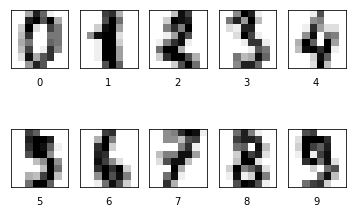

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [9]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [10]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1+np.exp(-z))
    
    return s

In [11]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [12]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = 0.
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [13]:
initialize_parameters(14)

(array([[ 0.63695566],
        [-0.02179306],
        [ 1.81843365],
        [-0.86700536],
        [-1.32608209],
        [ 0.26052548],
        [ 0.07694112],
        [-0.266356  ],
        [ 1.50709787],
        [-0.58811229],
        [-2.18303696],
        [ 1.40116222],
        [ 0.70322374],
        [ 0.31911037]]), 0.0)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [14]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    #print('w:',w)
    m = X.shape[0] #样本数量
    A = sigmoid(np.dot(X,w)+b)
    #print('A.shape:',A.shape)
    #cost = -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m #按公式这样写，但cost会出现nan的情况
    #Reference:https://blog.csdn.net/pan5431333/article/details/77606581
    cost = -np.sum(Y*np.log(A+ pow(10.0, -9))+(1-Y)*np.log(1-A+ pow(10.0, -9)))/m
    #print('cost',cost)
    dw = (1/m)*np.dot(X.T,A-Y) #(64,1)
    #print('dw.shape:',dw.shape)
    #print('dw:',dw)
    db = np.mean(A-Y)
    #print('db:',db)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [15]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [39]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X,w)+b)
    """
    for i in range(Y_prediction.shape[1]):
        if A[i] >= 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    """
    #对模型输出的概率值使用阈值转换成0和1可以使用 numpy.where完成，不需要使用循环
    Y_prediction = np.where(A>=0.5,1,0)
    Y_prediction = np.array([int(x) for x in Y_prediction]).reshape(1,m)
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [40]:
from sklearn.utils import shuffle,resample
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost=True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    #数据预处理
    Y_train = Y_train.reshape(-1,1) #size(m,1)
    Y_test = Y_test.reshape(-1,1)
    #参数初始化
    row,col = X_train.shape
    w,b = initialize_parameters(col)
    #训练
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    #train_accuracy
    Y_train_predict = predict(params['w'], params['b'], X_train)
    n = sum(Y_train_predict.T==Y_train)
    train_acc = float(n/Y_train.shape[0])
    #test_accuracy
    Y_test_predict = predict(params['w'], params['b'], X_test)
    n = sum(Y_test_predict.T==Y_test)
    test_acc = float(n/Y_test.shape[0])
    print("train_acc={:.4f},test_accuracy={:.4f}".format(train_acc,test_acc))
    return costs,learning_rate,num_iterations,train_acc,test_acc

In [42]:
model(X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=0.001,print_cost=True)

Cost after iteration 0: 9.898539
Cost after iteration 100: 9.083080
Cost after iteration 200: 8.714157
Cost after iteration 300: 8.127734
Cost after iteration 400: 7.415513
Cost after iteration 500: 6.608767
Cost after iteration 600: 5.775854
Cost after iteration 700: 5.052444
Cost after iteration 800: 4.443813
Cost after iteration 900: 3.961836
Cost after iteration 1000: 3.575825
Cost after iteration 1100: 3.253992
Cost after iteration 1200: 2.972603
Cost after iteration 1300: 2.732279
Cost after iteration 1400: 2.530979
Cost after iteration 1500: 2.365129
Cost after iteration 1600: 2.228953
Cost after iteration 1700: 2.115123
Cost after iteration 1800: 2.016986
Cost after iteration 1900: 1.930773
Cost after iteration 2000: 1.853873
Cost after iteration 2100: 1.783976
Cost after iteration 2200: 1.719562
Cost after iteration 2300: 1.659655
Cost after iteration 2400: 1.603685
Cost after iteration 2500: 1.551250
Cost after iteration 2600: 1.501933
Cost after iteration 2700: 1.455461
Cost

([9.898538917537515,
  9.083080258895281,
  8.71415711976331,
  8.127734276783258,
  7.415513382625394,
  6.608767117889004,
  5.775853601668438,
  5.052443658553529,
  4.443812665723129,
  3.9618355422653924,
  3.5758251350445747,
  3.2539919599122498,
  2.9726028758148932,
  2.7322790606453635,
  2.530978659308201,
  2.365129370515609,
  2.228953431740102,
  2.11512341555809,
  2.0169858077898577,
  1.9307734264953964,
  1.8538726353161619,
  1.7839761026198397,
  1.7195623391568757,
  1.6596546077635093,
  1.603684762501641,
  1.551250492701706,
  1.5019328805221692,
  1.4554612566122773,
  1.4117116773283251,
  1.370602172132826,
  1.3320318073042265,
  1.2958704300780108,
  1.261966142162849,
  1.2301546501127258,
  1.2002597995372672,
  1.1720997018409294,
  1.1455079074510257,
  1.1203541163706061,
  1.09655144699153,
  1.0740476450188816,
  1.0527998548508852,
  1.032745609842055,
  1.0137951969875207,
  0.9958473585798064,
  0.9788070521054633,
  0.9625939583398095,
  0.947143

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

train_acc=0.7305,test_accuracy=0.7222
train_acc=0.8753,test_accuracy=0.8333
train_acc=0.9131,test_accuracy=0.8911


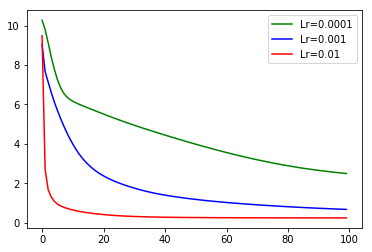

In [46]:
import matplotlib.pyplot as plt
costs1,Lr1,_,_,_ = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=0.0001,print_cost=False)
plt.plot(range(len(costs1)),costs1,color='g',label="Lr="+str(Lr1))
costs2,Lr2,_,_,_ = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=0.001,print_cost=False)
plt.plot(range(len(costs2)),costs2,color='b',label="Lr="+str(Lr2))
costs3,Lr3,_,_,_ = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=0.01,print_cost=False)
plt.plot(range(len(costs3)),costs3,color='r',label="Lr="+str(Lr3))
plt.legend(loc='upper right')
plt.show()

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [47]:
iters=[]
train_accs=[]
test_accs=[]
for i in range(1,10001):
    if i%100 == 0:
        _,_,iter,train_acc,test_acc = model(X_train, y_train, X_test, y_test, num_iterations=i, learning_rate=0.001,print_cost=False)
        iters.append(iter)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

train_acc=0.4514,test_accuracy=0.4489
train_acc=0.5909,test_accuracy=0.5444
train_acc=0.5531,test_accuracy=0.5644
train_acc=0.6437,test_accuracy=0.6044
train_acc=0.6399,test_accuracy=0.6022
train_acc=0.5531,test_accuracy=0.5733
train_acc=0.7253,test_accuracy=0.7400
train_acc=0.5754,test_accuracy=0.5778
train_acc=0.6043,test_accuracy=0.6156
train_acc=0.7298,test_accuracy=0.7022
train_acc=0.6637,test_accuracy=0.6800
train_acc=0.7164,test_accuracy=0.7000
train_acc=0.7157,test_accuracy=0.7111
train_acc=0.7290,test_accuracy=0.7267
train_acc=0.7610,test_accuracy=0.7222
train_acc=0.7602,test_accuracy=0.7444
train_acc=0.7765,test_accuracy=0.7578
train_acc=0.7929,test_accuracy=0.7867
train_acc=0.7416,test_accuracy=0.7311
train_acc=0.7958,test_accuracy=0.7711
train_acc=0.7520,test_accuracy=0.7644
train_acc=0.7676,test_accuracy=0.7444
train_acc=0.7765,test_accuracy=0.7578
train_acc=0.7773,test_accuracy=0.7733
train_acc=0.8122,test_accuracy=0.8000
train_acc=0.7847,test_accuracy=0.7933
train_acc=0.

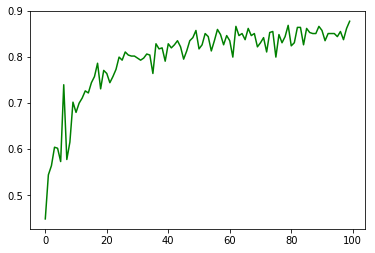

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(len(test_accs)),test_accs,color='g',label="Lr="+str(Lr1))

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

<font color='purple'>**直接利用MLPClassifier搭建model**

**Step1:Load data**

In [157]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [158]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [159]:
print(X_train.shape)

(1347, 64)


In [160]:
print(y_train.shape)

(1347,)


**Step2:Design a Model**

MLP参数：<br>
https://blog.csdn.net/Mrzhang0419/article/details/79519994 中文


In [161]:
from sklearn.neural_network import MLPClassifier

In [162]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50),activation='relu',alpha=1e-4,solver='sgd',random_state=1,verbose=True)

**Step3:Training the Model**

In [163]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 6.21076833
Iteration 2, loss = 2.46443285
Iteration 3, loss = 1.69394416
Iteration 4, loss = 1.30788175
Iteration 5, loss = 1.05166964
Iteration 6, loss = 0.86288801
Iteration 7, loss = 0.72723618
Iteration 8, loss = 0.62607120
Iteration 9, loss = 0.54986028
Iteration 10, loss = 0.48639324
Iteration 11, loss = 0.43564168
Iteration 12, loss = 0.39202217
Iteration 13, loss = 0.35750066
Iteration 14, loss = 0.32762891
Iteration 15, loss = 0.30205140
Iteration 16, loss = 0.28010271
Iteration 17, loss = 0.26063958
Iteration 18, loss = 0.24445187
Iteration 19, loss = 0.22961754
Iteration 20, loss = 0.21715324
Iteration 21, loss = 0.20595775
Iteration 22, loss = 0.19473211
Iteration 23, loss = 0.18574755
Iteration 24, loss = 0.17738243
Iteration 25, loss = 0.17013057
Iteration 26, loss = 0.16397285
Iteration 27, loss = 0.15775600
Iteration 28, loss = 0.15138216
Iteration 29, loss = 0.14577517
Iteration 30, loss = 0.14066062
Iteration 31, loss = 0.13717291
Iteration 32, los

d:\program files\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [164]:
mlp.out_activation_ #输出函数

'softmax'

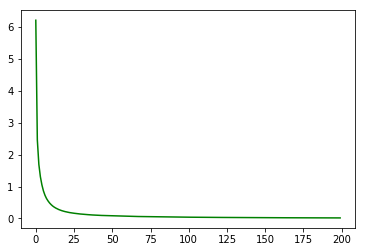

In [165]:
losses = mlp.loss_curve_
plt.plot(range(len(losses)),losses,color='g')

**Step3:predict and calculate accuracy**

In [166]:
def predict(model,x_train,y_train,x_test,y_test):
    pred_train = model.predict(x_train)
    acc_train = sum(pred_train==y_train)/len(y_train)
    print("acc_train=",acc_train)
    pred_test = model.predict(x_test)
    acc_test = sum(pred_test==y_test)/len(y_test)
    print("acc_test=",acc_test)
    return acc_train,acc_test

In [167]:
predict(mlp,X_train,y_train,X_test,y_test)

acc_train= 0.9992576095025983
acc_test= 0.9644444444444444


(0.9992576095025983, 0.9644444444444444)

# Congratulations ! You have completed assigment 4. 